In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

from scipy.optimize import curve_fit, minimize

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

__Include: Main LRGs in SV1 + Main LRGs in Main Survey + SV3 LRGs.__

In [3]:
perexp = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/spectro/fugu/sv1_perexp_lrg.fits'))
# perexp = Table(fitsio.read('/Users/rongpu/Documents/Data/desi_data/fugu/sv1_perexp_lrg.fits'))

# Remove FIBERSTATUS!=0 fibers
mask = perexp['FIBERSTATUS']==0
print('FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
perexp = perexp[mask]

# Remove "no data" fibers
mask = perexp['ZWARN'] & 2**9==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
perexp = perexp[mask]

# Apply LRG mask
mask = perexp['lrg_mask']==0
print('LRG mask', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
perexp = perexp[mask]

# Remove QSO targets
mask = perexp['SV1_DESI_TARGET'] & 2**2 ==0
print('Remove QSO targets', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
perexp = perexp[mask]

mask = perexp['main_lrg'].copy()
print('Main LRG', np.sum(mask), np.sum(~mask), np.sum(mask)/len(mask))
perexp = perexp[mask]

# Redshift quality: custom DELTACHI2 vs z cut
d = (10**(3 - 3.5*perexp['Z']))
perexp['q'] = ((perexp['DELTACHI2']>d) & (perexp['DELTACHI2']>10)) | (perexp['DELTACHI2']>30)
perexp['q'] &= perexp['Z']<1.4
perexp['q'] &= perexp['ZWARN']<1.4
print(np.sum(~perexp['q'])/len(perexp))

FIBERSTATUS 464751 107007 0.18715435551404616
No data 464751 0 0.0
LRG mask 417693 47058 0.10125422000167832
Remove QSO targets 403772 13921 0.03332830571735701
Main LRG 111818 291954 0.2769335169353001
0.1799620812391565


In [4]:
cat_1x = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/spectro/fugu/sv1_1x_depth_lrg.fits'))
# cat_1x = Table(fitsio.read('/Users/rongpu/Documents/Data/desi_data/fugu/sv1_1x_depth_lrg.fits'))

# Remove FIBERSTATUS!=0 fibers
mask = cat_1x['COADD_FIBERSTATUS']==0
print('FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat_1x = cat_1x[mask]

# Remove "no data" fibers
mask = cat_1x['ZWARN'] & 2**9==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat_1x = cat_1x[mask]

# Apply LRG mask
mask = cat_1x['lrg_mask']==0
print('LRG mask', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat_1x = cat_1x[mask]

# Remove QSO targets
mask = cat_1x['SV1_DESI_TARGET'] & 2**2 ==0
print('Remove QSO targets', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
cat_1x = cat_1x[mask]

mask = cat_1x['main_lrg'].copy()
print('Main LRG', np.sum(mask), np.sum(~mask), np.sum(mask)/len(mask))
cat_1x = cat_1x[mask]

# Redshift quality: custom DELTACHI2 vs z cut
d = (10**(3 - 3.5*cat_1x['Z']))
cat_1x['q'] = ((cat_1x['DELTACHI2']>d) & (cat_1x['DELTACHI2']>10)) | (cat_1x['DELTACHI2']>30)
cat_1x['q'] &= cat_1x['Z']<1.4
cat_1x['q'] &= cat_1x['ZWARN']<1.4
print(np.sum(~cat_1x['q'])/len(cat_1x))

FIBERSTATUS 27110 4943 0.15421333416528873
No data 27110 0 0.0
LRG mask 25008 2102 0.07753596458871265
Remove QSO targets 24493 515 0.020593410108765194
Main LRG 6609 17884 0.26983219695423183
0.013315176274776819


In [5]:
deep = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/spectro/fugu/sv1_cumulative_lrg.fits'))
# deep = Table(fitsio.read('/Users/rongpu/Documents/Data/desi_data/fugu/sv1_cumulative_lrg.fits'))

# Remove FIBERSTATUS!=0 fibers
mask = deep['COADD_FIBERSTATUS']==0
print('COADD_FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
deep = deep[mask]

mask = deep['ZWARN']==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
deep = deep[mask]

# Apply LRG mask
mask = deep['lrg_mask']==0
print('LRG mask', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
deep = deep[mask]

# Remove QSO targets
mask = deep['SV1_DESI_TARGET'] & 2**2 ==0
print('Remove QSO targets', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
deep = deep[mask]

mask = deep['main_lrg'].copy()
print('Main LRG', np.sum(mask), np.sum(~mask), np.sum(mask)/len(mask))
deep = deep[mask]

# Redshift quality: custom DELTACHI2 vs z cut
d = (10**(3 - 3.5*deep['Z']))
deep['q'] = ((deep['DELTACHI2']>d) & (deep['DELTACHI2']>10)) | (deep['DELTACHI2']>30)
deep['q'] &= deep['Z']<1.4
deep['q'] &= deep['ZWARN']<1.4
print(np.sum(~deep['q'])/len(deep))

COADD_FIBERSTATUS 46319 8916 0.16141938987960533
No data 45437 882 0.01904186187093849
LRG mask 41340 4097 0.09016880515879129
Remove QSO targets 39668 1672 0.040445089501693274
Main LRG 11146 28522 0.2809821518604417
0.0034990130988695497


In [6]:
main = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/spectro/fugu/main_cumulative_lrg.fits'))
# main = Table(fitsio.read('/Users/rongpu/Documents/Data/desi_data/fugu/main_cumulative_lrg.fits'))

# Remove FIBERSTATUS!=0 fibers
mask = main['COADD_FIBERSTATUS']==0
print('FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
main = main[mask]

# Remove "no data" fibers
mask = main['ZWARN'] & 2**9==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
main = main[mask]

# Apply LRG mask
mask = main['lrg_mask']==0
print('LRG mask', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
main = main[mask]

# Remove QSO targets
mask = main['DESI_TARGET'] & 2**2 ==0
print('Remove QSO targets', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
main = main[mask]

# Redshift quality: custom DELTACHI2 vs z cut
d = (10**(3 - 3.5*main['Z']))
main['q'] = ((main['DELTACHI2']>d) & (main['DELTACHI2']>10)) | (main['DELTACHI2']>30)
main['q'] &= main['Z']<1.4
main['q'] &= main['ZWARN']<1.4
print(np.sum(~main['q'])/len(main))

main['main_lrg'] = True

FIBERSTATUS 338266 7165 0.020742203218587794
No data 338265 1 2.9562533627382e-06
LRG mask 304337 33928 0.1003000606033731
Remove QSO targets 299639 4698 0.015436834824553046
0.012031144143452622


In [7]:
sv3 = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/spectro/fugu/sv3_cumulative_lrg.fits'))
# sv3 = Table(fitsio.read('/Users/rongpu/Documents/Data/desi_data/fugu/sv3_cumulative_lrg.fits'))

# Remove FIBERSTATUS!=0 fibers
mask = sv3['COADD_FIBERSTATUS']==0
print('FIBERSTATUS',np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
sv3 = sv3[mask]

# Remove "no data" fibers
mask = sv3['ZWARN'] & 2**9==0
print('No data', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
sv3 = sv3[mask]

# Apply LRG mask
mask = sv3['lrg_mask']==0
print('LRG mask', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
sv3 = sv3[mask]

# Remove QSO targets
mask = sv3['DESI_TARGET'] & 2**2 ==0
print('Remove QSO targets', np.sum(mask), np.sum(~mask), np.sum(~mask)/len(mask))
sv3 = sv3[mask]

# Redshift quality: custom DELTACHI2 vs z cut
d = (10**(3 - 3.5*sv3['Z']))
sv3['q'] = ((sv3['DELTACHI2']>d) & (sv3['DELTACHI2']>10)) | (sv3['DELTACHI2']>30)
sv3['q'] &= sv3['Z']<1.4
sv3['q'] &= sv3['ZWARN']<1.4
print(np.sum(~sv3['q'])/len(sv3))

FIBERSTATUS 164618 18004 0.09858615062807329
No data 164614 4 2.4298679366776417e-05
LRG mask 150726 13888 0.08436706476970367
Remove QSO targets 150726 0 0.0
0.015252842906996801


In [8]:
cat = vstack([perexp, cat_1x, main, deep, sv3], join_type='inner')
print(len(cat))

cat['EFFTIME_ELG'] = 8.60 * cat['TSNR2_ELG']
cat['EFFTIME_LRG'] = 12.15 * cat['TSNR2_LRG']
cat['zfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_Z']) - 1.211 * cat['EBV']
cat['FIBERFLUX_Z_EC'] = cat['FIBERFLUX_Z']*10**(0.4*1.211*cat['EBV'])
cat['qf'] = np.array(cat['q'], dtype=float)

579938


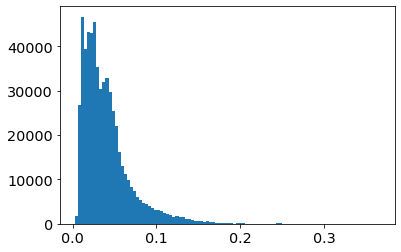

In [9]:
plt.hist(cat['EBV'], 100);

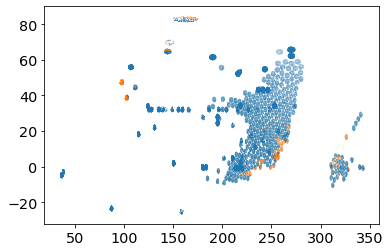

In [10]:
mask = cat['EBV']<0.1
plt.plot(cat['TARGET_RA'][mask], cat['TARGET_DEC'][mask], '.', ms=0.1, alpha=0.1)
plt.plot(cat['TARGET_RA'][~mask], cat['TARGET_DEC'][~mask], '.', ms=0.1, alpha=0.1)
plt.show()

In [11]:
mask = cat['EBV']<0.1
print(np.sum(mask)/len(mask))
cat = cat[mask]

0.9501084598698482


In [12]:
mask = cat['EFFTIME_LRG']>500
mask &= cat['EFFTIME_LRG']<2000
cat = cat[mask]
print(len(cat))

mask = cat['zfibermag']>19.
mask &= cat['zfibermag']<22.
cat = cat[mask]
print(len(cat))

469604
467088


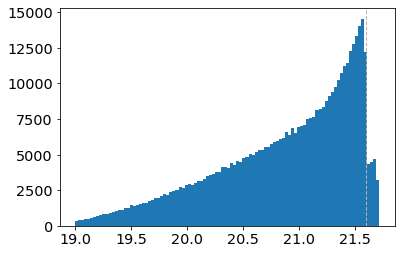

In [13]:
plt.hist(cat['zfibermag'], 100)
plt.axvline(21.6, ls='--', color='0.7', lw=1)
plt.show()

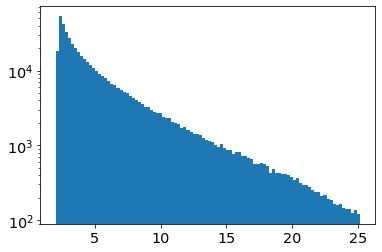

In [14]:
plt.hist(cat['FIBERFLUX_Z_EC'], 100, log=True);

In [15]:
print(np.sum((~cat['q'])), np.sum((~cat['q']))/len((~cat['q'])))
mask = (cat['EFFTIME_LRG']>800) & (cat['EFFTIME_LRG']<1200)
print(np.sum((~cat['q']) & mask), np.sum((~cat['q']) & mask)/np.sum(mask))

6127 0.013117442537594629
4085 0.01234560439062278


-------

In [16]:
def cost(q_predict):
    return np.sum((cat['qf']-q_predict)**2)

def wrapper(params):
    q_predict = 1-failure_rate(cat['FIBERFLUX_Z_EC'], cat['EFFTIME_LRG'], *params)
    return cost(q_predict)

# def failure_rate(flux, efftime, a, b):
#     sn = flux * np.sqrt(efftime)
#     return np.clip(np.exp(-(sn+a)/b), 0, 1)
# res = minimize(wrapper, [0, 10.], bounds=((-200, 200), (0, 100)),
#                method='Powell', tol=1e-6)

# Add 1/flux term
def failure_rate(flux, efftime, a, b, c):
    sn = flux * np.sqrt(efftime)
    return np.clip(np.exp(-(sn+a)/b)+c/flux, 0, 1)
res = minimize(wrapper, [0, 10., 0.01], bounds=((-200, 200), (0, 100), (0., 1)),
               method='Powell', tol=1e-6)

# # Include minimal failure rate
# def failure_rate(flux, efftime, a, b, c):
#     sn = flux * np.sqrt(efftime)
#     return np.clip(np.exp(-(sn+a)/b)-c, 0, 1)
# res = minimize(wrapper, [0, 10., 0.001], bounds=((-200, 200), (0, 100), (0, 0.01)),
#                method='Powell', tol=1e-6)

# # Include sky contribution
# def failure_rate(flux, efftime, a, b, c):
#     sn = flux / np.sqrt(flux + c) * np.sqrt(efftime)
#     return np.clip(np.exp(-(sn+a)/b), 0, 1)
# res = minimize(wrapper, [-1.16346025e-01, 2.3,  10],
#                method='Powell', tol=1e-6)

print(res)
params = res.x
print()
print(wrapper(params))

   direc: array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.74210935e+00,  1.13978875e-01,  4.14824871e-03],
       [ 1.29435146e+00,  5.16568778e-01, -1.47871096e-03]])
     fun: 5948.023641087514
 message: 'Optimization terminated successfully.'
    nfev: 475
     nit: 6
  status: 0
 success: True
       x: array([-3.25094687e+01,  1.11746260e+01,  2.93002295e-02])

5948.023641087514


In [17]:
cat['success_prob'] = 1-failure_rate(cat['FIBERFLUX_Z_EC'], cat['EFFTIME_LRG'], *params)
print(np.sum(~cat['q']), np.sum(1-cat['success_prob']))
print(np.sum(~cat['q'])/np.sum(1-cat['success_prob']))

mask = cat['main_lrg'].copy()
print(np.sum(~cat['q'][mask]), np.sum(1-cat['success_prob'][mask]))
print(np.sum(~cat['q'][mask])/np.sum(1-cat['success_prob'][mask]))

6127 6142.4956
0.9974773111021921
5277 5319.089
0.9920872036097876


Failure rate at zfiber=21.6:
0.04084347453678171


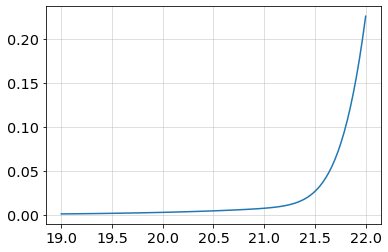

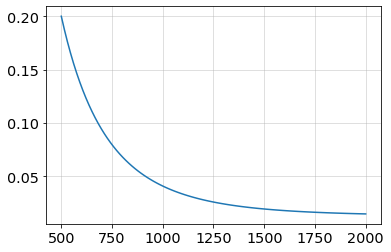

In [18]:
zfiber = 21.6
flux = 10**(-0.4*(zfiber-22.5))
efftime = 1000.
print('Failure rate at zfiber=21.6:')
print(failure_rate(flux, efftime, *params))

zfiber = np.linspace(19, 22, 100)
flux = 10**(-0.4*(zfiber-22.5))
efftime = np.full(len(zfiber), 1000.)
plt.plot(zfiber, failure_rate(flux, efftime, *params))
plt.grid(alpha=0.5)
plt.show()

efftime = np.linspace(500, 2000, 100)
zfiber = np.full(len(efftime), 21.6)
flux = 10**(-0.4*(zfiber-22.5))
plt.plot(efftime, failure_rate(flux, efftime, *params))
plt.grid(alpha=0.5)
plt.show()

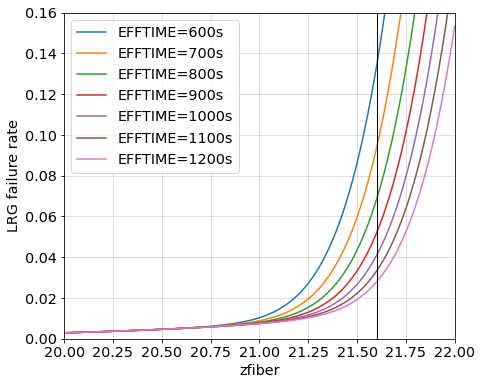

In [19]:
zfiber = 21.6
flux = 10**(-0.4*(zfiber-22.5))
efftimes = [600, 700, 800, 900, 1000., 1100, 1200]

zfiber = np.linspace(20., 22., 100)
flux = 10**(-0.4*(zfiber-22.5))
plt.figure(figsize=(7, 6))
for efftime in efftimes:
    efftime = np.full(len(zfiber), efftime)
    plt.plot(zfiber, failure_rate(flux, efftime, *params), label='EFFTIME={:.0f}s'.format(efftime[0]))
plt.grid(alpha=0.5)
plt.ylabel('LRG failure rate')
plt.xlabel('zfiber')
plt.legend()
plt.axvline(21.6, lw=1, color='k')
plt.axis([20., 22., 0, 0.16])
plt.show()

<ipython-input-20-c3c9295c4430>:7: RuntimeWarning: invalid value encountered in true_divide
  success_2d = count_2d_good/count_2d_all


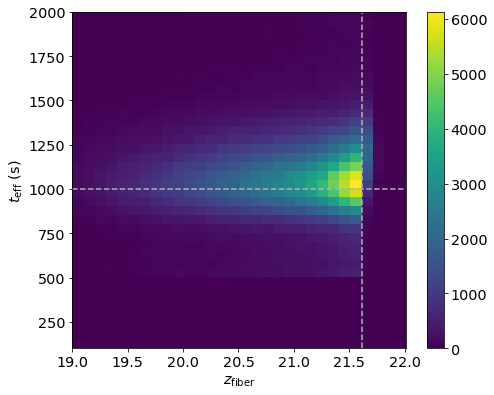

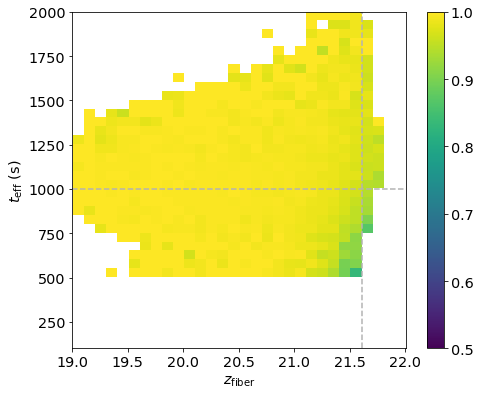

In [20]:
zfiber_bin_edges = np.linspace(18.01, 22.01, 41)
efftime_bin_edges = np.linspace(100, 2000, 39)

count_2d_all = np.histogram2d(cat['zfibermag'], cat['EFFTIME_LRG'], bins=[zfiber_bin_edges, efftime_bin_edges])[0]
mask = cat['q'].copy()
count_2d_good = np.histogram2d(cat['zfibermag'][mask], cat['EFFTIME_LRG'][mask], bins=[zfiber_bin_edges, efftime_bin_edges])[0]
success_2d = count_2d_good/count_2d_all

success_2d[count_2d_all<=50] = np.nan

fig, ax = plt.subplots(figsize=(7, 5.6))
cax = ax.imshow(count_2d_all.T, origin='lower', aspect='auto',
           extent=(zfiber_bin_edges.min(), zfiber_bin_edges.max(), efftime_bin_edges.min(), efftime_bin_edges.max()))
ax.set_xlabel('$z_\mathrm{fiber}$')
ax.set_ylabel('$t_\mathrm{eff}$ (s)')
ax.set_xlim(xmin=19)
ax.axhline(1000., color='0.7', ls='--')
ax.axvline(21.61, color='0.7', ls='--')
plt.colorbar(cax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5.6))
cax = ax.imshow(success_2d.T, origin='lower', aspect='auto', vmin=0.5, vmax=1.,
           extent=(zfiber_bin_edges.min(), zfiber_bin_edges.max(), efftime_bin_edges.min(), efftime_bin_edges.max()))
ax.set_xlabel('$z_\mathrm{fiber}$')
ax.set_ylabel('$t_\mathrm{eff}$ (s)')
ax.set_xlim(xmin=19)
ax.axhline(1000., color='0.7', ls='--')
ax.axvline(21.61, color='0.7', ls='--')
plt.colorbar(cax)
plt.tight_layout()
plt.show()

<ipython-input-21-119191d5c7ca>:2: RuntimeWarning: invalid value encountered in true_divide
  success_2d_predict = count_2d_good_predict/count_2d_all


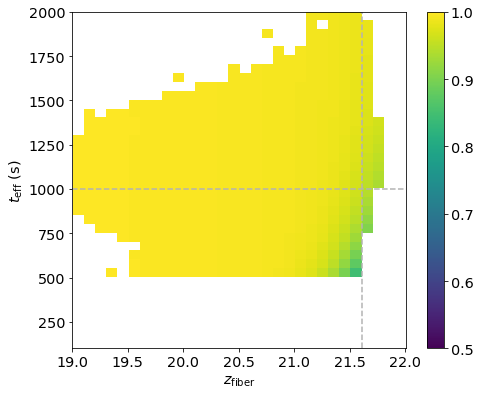

In [21]:
count_2d_good_predict = np.histogram2d(cat['zfibermag'], cat['EFFTIME_LRG'], bins=[zfiber_bin_edges, efftime_bin_edges], weights=cat['success_prob'])[0]
success_2d_predict = count_2d_good_predict/count_2d_all

success_2d_predict[count_2d_all<=50] = np.nan

fig, ax = plt.subplots(figsize=(7, 5.6))
cax = ax.imshow(success_2d_predict.T, origin='lower', aspect='auto', vmin=0.5, vmax=1.,
           extent=(zfiber_bin_edges.min(), zfiber_bin_edges.max(), efftime_bin_edges.min(), efftime_bin_edges.max()))
ax.set_xlabel('$z_\mathrm{fiber}$')
ax.set_ylabel('$t_\mathrm{eff}$ (s)')
ax.set_xlim(xmin=19)
ax.axhline(1000., color='0.7', ls='--')
ax.axvline(21.61, color='0.7', ls='--')
plt.colorbar(cax)
plt.tight_layout()
plt.show()

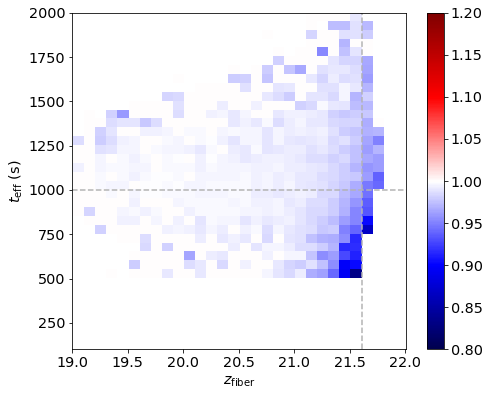

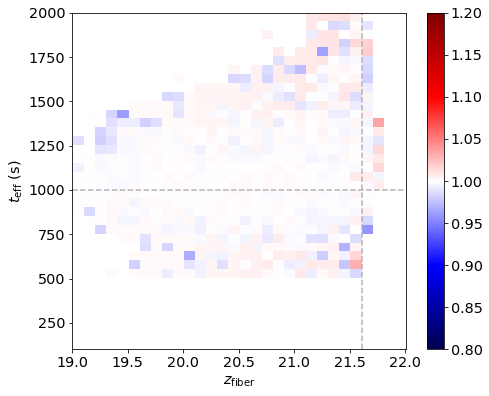

In [22]:
fig, ax = plt.subplots(figsize=(7, 5.6))
cax = ax.imshow((success_2d).T, origin='lower', aspect='auto', vmin=0.8, vmax=1.2, cmap='seismic',
           extent=(zfiber_bin_edges.min(), zfiber_bin_edges.max(), efftime_bin_edges.min(), efftime_bin_edges.max()))
ax.set_xlabel('$z_\mathrm{fiber}$')
ax.set_ylabel('$t_\mathrm{eff}$ (s)')
ax.set_xlim(xmin=19)
ax.axhline(1000., color='0.7', ls='--')
ax.axvline(21.61, color='0.7', ls='--')
plt.colorbar(cax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5.6))
cax = ax.imshow((success_2d/success_2d_predict).T, origin='lower', aspect='auto', vmin=0.8, vmax=1.2, cmap='seismic',
           extent=(zfiber_bin_edges.min(), zfiber_bin_edges.max(), efftime_bin_edges.min(), efftime_bin_edges.max()))
ax.set_xlabel('$z_\mathrm{fiber}$')
ax.set_ylabel('$t_\mathrm{eff}$ (s)')
ax.set_xlim(xmin=19)
ax.axhline(1000., color='0.7', ls='--')
ax.axvline(21.61, color='0.7', ls='--')
plt.colorbar(cax)
plt.tight_layout()
plt.show()

------

In [23]:
def binned_frac(x, y, bin_edges, minsize=10, error_floor=True):
    bin_center = (bin_edges[1:] + bin_edges[:-1])/2
    bin_frac = np.zeros(len(bin_edges)-1)
    bin_frac_err = np.zeros(len(bin_edges)-1)
    for index in range(len(bin_edges)-1):
        mask = (x>bin_edges[index]) & (x<=bin_edges[index+1])
        if np.sum(mask)<minsize:
            bin_frac[index] = np.nan
            bin_frac_err[index] = np.nan
        else:
            n, p = np.sum(mask), np.mean(y[mask])
            if error_floor:
                p1 = np.maximum(p, 1/n)  # error floor
            else:
                p1 = p
            bin_frac[index] = p
            bin_frac_err[index] = np.clip(np.sqrt(n * p * (1-p))/n, np.sqrt(n * p1 * (1-p1))/n, 1)
    
    return bin_center, bin_frac, bin_frac_err

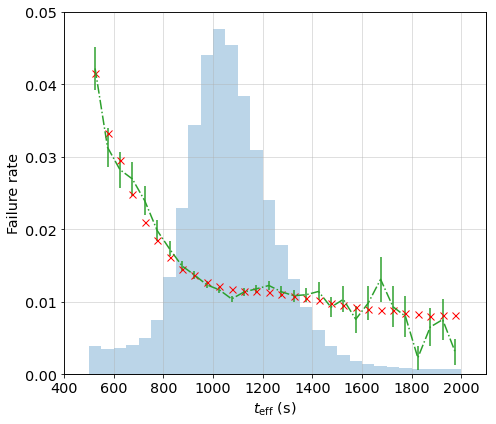

In [24]:
mask = np.full(len(cat), True)

area = len(cat)/600

bin_edges = np.linspace(0, 2000, 41)
bin_center, bin_reject_rate, bin_reject_rate_err = binned_frac(cat['EFFTIME_LRG'][mask], (~cat['q'][mask]), bin_edges, minsize=10, error_floor=False)
_, bin_reject_rate_predict, _ = binned_frac(cat['EFFTIME_LRG'][mask], 1-cat['success_prob'][mask], bin_edges, minsize=10, error_floor=False)

fig, ax1 = plt.subplots(figsize=(7., 6.))
ax1.errorbar(bin_center, bin_reject_rate,
             yerr=(np.clip(bin_reject_rate_err, None, bin_reject_rate), bin_reject_rate_err),
             fmt='-.', color='C2')
ax1.plot(bin_center, bin_reject_rate_predict, 'x', color='r', ms=7)
# ax1.xlabel('EFFTIME_LRG')
ax1.set_xlabel('$t_\mathrm{eff}$ (s)')
ax1.set_ylabel('Failure rate')
ax1.grid(alpha=0.5)
# ax1.legend(loc='upper right')
ax2 = ax1.twinx()
ax2_color = 'C0'
ax2.hist(cat['EFFTIME_LRG'][mask], bins=bin_edges, color='C0', alpha=0.3, label=None, weights=np.full(np.sum(mask), 1/area))
# ax2.set_ylabel('a.u.', color=ax2_color)
# ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_visible(False)
ax1.set_zorder(1)
ax1.patch.set_visible(False)
ax1.axis([400, 2100, 0.00, 0.05])
plt.tight_layout()
plt.show()

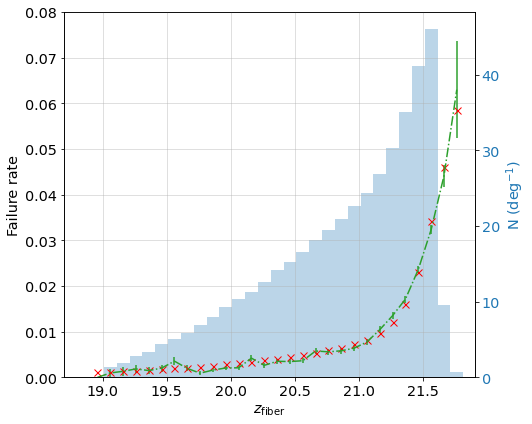

In [25]:
mask = (cat['EFFTIME_LRG']>800.) & (cat['EFFTIME_LRG']<1200.)
# mask &= cat['main_lrg'].copy()

bin_edges = np.linspace(18.01, 22.01, 41)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

# mask = mask & (cat['survey']=='main')
bin_center, bin_reject_rate, bin_reject_rate_err = binned_frac(cat['zfibermag'][mask], (~cat['q'])[mask], bin_edges, minsize=10, error_floor=False)
_, bin_reject_rate_predict, _ = binned_frac(cat['zfibermag'][mask], (1-cat['success_prob'])[mask], bin_edges, minsize=10, error_floor=False)

fig, ax1 = plt.subplots(figsize=(7.5, 6.))
ax1.errorbar(bin_center, bin_reject_rate,
             yerr=(np.clip(bin_reject_rate_err, None, bin_reject_rate), bin_reject_rate_err),
             fmt='-.', color='C2')
ax1.plot(bin_center, bin_reject_rate_predict, 'x', ms=7, color='r')
ax1.set_xlabel('$z_\mathrm{fiber}$')
ax1.set_ylabel('Failure rate')
ax1.grid(alpha=0.5)
# ax1.legend(loc='upper left')
# ax1.title('cat LRGs')
ax1.axis([18.7, 21.9, 0.00, 0.08])
ax2 = ax1.twinx()
ax2_color = 'C0'
ax2.hist(cat['zfibermag'][mask], bins=bin_edges, color='C0', alpha=0.3, label=None, weights=np.full(np.sum(mask), 1/area))
ax2.set_ylabel('N (deg$^{-1}$)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)

ax1.set_zorder(1)
ax1.patch.set_visible(False)

plt.tight_layout()
plt.show()

__Main LRGs only__

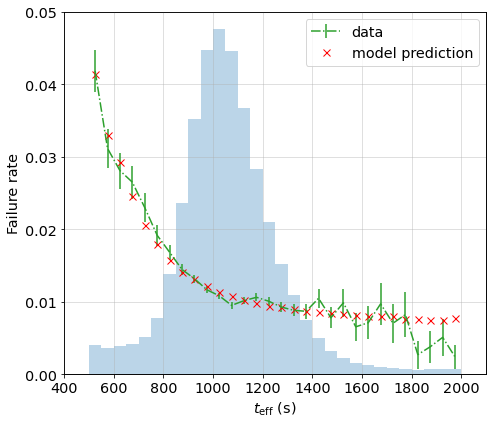

In [26]:
mask = cat['main_lrg'].copy()

area = len(cat)/600

bin_edges = np.linspace(0, 2000, 41)
bin_center, bin_reject_rate, bin_reject_rate_err = binned_frac(cat['EFFTIME_LRG'][mask], (~cat['q'][mask]), bin_edges, minsize=10, error_floor=False)
_, bin_reject_rate_predict, _ = binned_frac(cat['EFFTIME_LRG'][mask], 1-cat['success_prob'][mask], bin_edges, minsize=10, error_floor=False)

fig, ax1 = plt.subplots(figsize=(7., 6.))
ax1.errorbar(bin_center, bin_reject_rate,
             yerr=(np.clip(bin_reject_rate_err, None, bin_reject_rate), bin_reject_rate_err),
             fmt='-.', color='C2', label='data')
ax1.plot(bin_center, bin_reject_rate_predict, 'x', color='r', ms=7, label='model prediction')
# ax1.xlabel('EFFTIME_LRG')
ax1.set_xlabel('$t_\mathrm{eff}$ (s)')
ax1.set_ylabel('Failure rate')
ax1.grid(alpha=0.5)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='upper right')
ax2 = ax1.twinx()
ax2_color = 'C0'
ax2.hist(cat['EFFTIME_LRG'][mask], bins=bin_edges, color='C0', alpha=0.3, label=None, weights=np.full(np.sum(mask), 1/area))
# ax2.set_ylabel('a.u.', color=ax2_color)
# ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_visible(False)
ax1.set_zorder(1)
ax1.patch.set_visible(False)
ax1.axis([400, 2100, 0.00, 0.05])
plt.tight_layout()
plt.show()

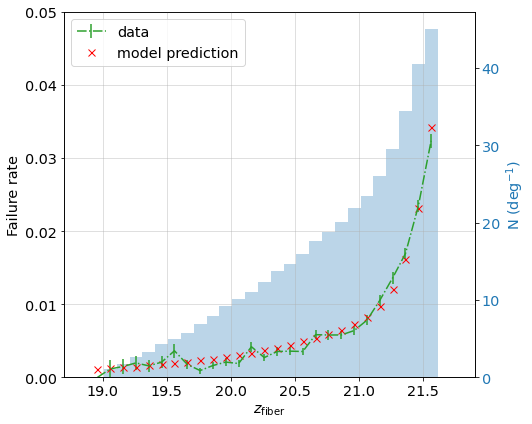

In [27]:
mask = (cat['EFFTIME_LRG']>800.) & (cat['EFFTIME_LRG']<1200.)
mask &= cat['main_lrg'].copy()

bin_edges = np.linspace(18.01, 22.01, 41)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

# mask = mask & (cat['survey']=='main')
bin_center, bin_reject_rate, bin_reject_rate_err = binned_frac(cat['zfibermag'][mask], (~cat['q'])[mask], bin_edges, minsize=10, error_floor=False)
_, bin_reject_rate_predict, _ = binned_frac(cat['zfibermag'][mask], (1-cat['success_prob'])[mask], bin_edges, minsize=10, error_floor=False)

fig, ax1 = plt.subplots(figsize=(7.5, 6.))
ax1.errorbar(bin_center, bin_reject_rate,
             yerr=(np.clip(bin_reject_rate_err, None, bin_reject_rate), bin_reject_rate_err),
             fmt='-.', color='C2', label='data')
ax1.plot(bin_center, bin_reject_rate_predict, 'x', ms=7, color='r', label='model prediction')
ax1.set_xlabel('$z_\mathrm{fiber}$')
ax1.set_ylabel('Failure rate')
ax1.grid(alpha=0.5)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='upper left')
ax1.axis([18.7, 21.9, 0.00, 0.05])
ax2 = ax1.twinx()
ax2_color = 'C0'
ax2.hist(cat['zfibermag'][mask], bins=bin_edges, color='C0', alpha=0.3, label=None, weights=np.full(np.sum(mask), 1/area))
ax2.set_ylabel('N (deg$^{-1}$)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)

ax1.set_zorder(1)
ax1.patch.set_visible(False)

plt.tight_layout()
plt.show()